### Problem

Một hôm đẹp trời, tôi sử dụng ứng dụng Grab để đặt 1 chuyến đi từ nhà tôi đến Bờ Hồ Hoàn Kiếm dài 5km nhưng xui thay ứng dụng này mất khả năng tính toán thành tiền và bác xe ôm đen đủi không thể biết được số tiền chính xác mà tôi cần phải trả.

May mắn thay, tôi vẫn còn truy cập được vào lịch sử các chuyến đi của mình như bảng bên dưới, liệu rằng dựa trên những thông tin này tôi có thể tính được số tiền mà tôi cần trả cho 5km ngày hôm nay?

 | Số Km (Km) | Số tiền cần trả (1000 VND) |
            | ------ | ------ |
            |    2   |   13   |
            |    7   |   35   |
            |    9   |   41   |
            |    3   |   19   |
            |    10  |   45   |
            |    6   |   28   |
            |    1   |   10   |
            |    8   |   55   |

 Giả sử **Số KM tôi đi** và **số tiền cần trả Grab** phụ thuộc tuyến tính vào nhau, tức là **số KM tăng** thì **số tiền cần trả Grab tăng** hoặc **số KM giảm** thì **số tiền cần trả Grab giảm**, tôi có thể tìm ra được 1 hàm biểu thị được mối quan hệ giữa 2 đại lượng này không? Câu trả lời là **Có**.

Tại sao lại cần tìm ra hàm đó? Vì nếu tìm ra được nó, việc tôi cần làm chỉ thay số KM tôi đi ngày hôm nay vào hàm và tìm ra được số tiền tôi cần trả.

Tôi đặt:
  - X là số Km tôi đi
  - Y là số tiền cần trả Grab

Hàm cần tìm sẽ có dạng **Y= aX + b**. Bài toán quy về: Với X và Y cho trước trên bảng trên, tìm 2 tham số a và b.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
 # utils function
def plot_polynomial(xmin, xmax, coef, color='C1'):
    #xs is an array of evenly spaced numbers between xmin and xmax
    xs = np.linspace(xmin, xmax, num=500)
    
    #ys is an array, each element is computed as a polynomial function of
    #the corresponding element of xs
    ys = np.zeros_like(xs)
    for p, c in enumerate(coef.flatten()):
        ys += c*np.power(xs, p)
    plt.plot(xs, ys, color=color)

In [33]:
X_raw = np.array([[2], [7], [9], [3], [10], [6], [1], [8]])
Y = np.array([[13], [35], [41], [19], [45], [28], [10], [55]])

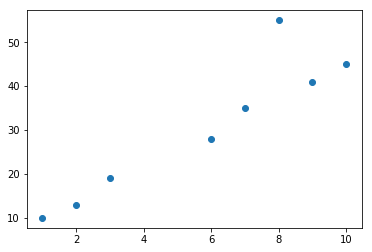

In [34]:
plt.scatter(X_raw, Y)
plt.show()

In [37]:
X = np.concatenate((X_raw, np.ones_like(X_raw)), axis = 1)
X

array([[ 2,  1],
       [ 7,  1],
       [ 9,  1],
       [ 3,  1],
       [10,  1],
       [ 6,  1],
       [ 1,  1],
       [ 8,  1]])

## Normal equation

In [38]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))


In [39]:
theta

array([[4.40880503],
       [5.39937107]])

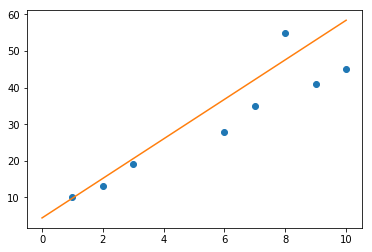

In [40]:
plt.scatter(X_raw, Y)
plot_polynomial(0, 10, theta)
plt.show()


## Gradient descent

In [48]:
m = X.shape[0]
m

8

In [49]:
alpha = 0.02  # learning rate

In [50]:
def gradient_loss(X, Y, theta, m):
    return 1/m * X.T.dot(X.dot(theta) - Y)
    

In [61]:
def loss(X, Y, theta, m):
#     tmp = X.dot(theta) - y
#     return 1/2/m * (tmp.dot(tmp.T))
    return 1/(2*m) * np.sum((X.dot(theta) - Y)**2)

In [62]:
theta_2 = np.random.normal(size=2).reshape([2, 1])
theta_2

array([[-0.55068775],
       [-0.9311207 ]])

In [63]:
for i in range(1000):
    grad = gradient_loss(X, Y, theta_2, m)
    theta_2 = theta_2 - alpha * grad
    print(loss(X, Y, theta_2, m))
    

31.0652250536938
19.95010356328605
19.746381387151338
19.71218240421078
19.68089400706033
19.649929431297647
19.619246030447368
19.588840641017512
19.558710734579407
19.52885381501823
19.499267408980685
19.469949065525142
19.440896355916312
19.41210687342406
19.383578233124055
19.35530807170011
19.327294047248493
19.29953383908389
19.272025147547147
19.244765693814784
19.217753219710236
19.19098548751672
19.16446027979193
19.13817539918431
19.112128668251042
19.086317929277637
19.06074104409924
19.035395893923447
19.01028037915482
18.985392419220947
18.960729952400083
18.93629093565038
18.912073344440593
18.888075172582415
18.864294432064266
18.840729152886606
18.817377382898727
18.79423718763705
18.7713066501649
18.74858387091365
18.72606696752539
18.703754074697024
18.68164334402568
18.659732943855648
18.638021059126604
18.616505891223298
18.595185657826484
18.574058592765343
18.553122945871156
18.53237698283228
18.51181898505052
18.49144724949875
18.471260088579825
18.45125582998679

In [64]:
theta_2

array([[4.41670152],
       [5.34063081]])

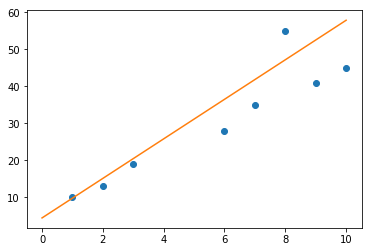

In [65]:
plt.scatter(X_raw, Y)
plot_polynomial(0, 10, theta_2)
plt.show()
